Following this Tutorial for CNN - Feature Extraction 

https://www.youtube.com/watch?v=9GzfUzJeyi0&t=277s

Essential Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import cv2

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd ..
from google.colab import drive
drive.mount('./content/gdrive')

/
Mounted at ./content/gdrive


In [ ]:
print(os.listdir("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG"))

['test', 'train']


In [ ]:
SIZE = 64

train_images = []
train_labels = [] 

# path = "/content/gdrive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/"

for directory_path in glob.glob("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/*"):
    label = directory_path.split("\\")[-1]
    # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
        # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        train_images.append(img)
        train_labels.append(label)
        
train_images = np.array(train_images)
train_labels = np.array(train_labels)

In [ ]:
print(train_images.shape)
print(train_labels.shape)

(187, 64, 64, 3)
(187,)


In [ ]:
test_images = []
test_labels = []

for directory_path in glob.glob("/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/*"):
    fruit_label = directory_path.split("\\")[-1]
   # print(label)
    for img_path in glob.glob(os.path.join(directory_path, "*.jpg")):
       # print(img_path)
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)       
        img = cv2.resize(img, (SIZE, SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
        test_images.append(img)
        test_labels.append(fruit_label)
        
test_images = np.array(test_images)
test_labels = np.array(test_labels)

In [ ]:
print(test_images.shape)
print(test_labels.shape)

(187, 64, 64, 3)
(187,)


Let's encode the labels from text to integers

In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(test_labels)
test_labels_encoded = le.transform(test_labels)
le.fit(train_labels)
train_labels_encoded = le.transform(train_labels)

In [ ]:
train_labels_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_labels_encoded

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Let's give the train and test proper names

In [ ]:
CATEGORIES = {"normal" : 1, "abnormal": 0}

In [ ]:
X_train_labels = []
#X_test_labels = []

for category in CATEGORIES:            
    if "abnormal" in category:
      X_train_labels.append(0)
    else:
      X_train_labels.append(1)

In [ ]:
#X_train_labels = []
X_test_labels = []

for category in CATEGORIES:            
    if "abnormal" in category:
      X_test_labels.append(0)
    else:
      X_test_labels.append(1)

In [ ]:
X_train, y_train, X_test, y_test = train_images, train_labels_encoded, test_images, test_labels_encoded

Scaling

In [ ]:

# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train = scaler.fit_transform(X_train)
X_train, X_test = X_train / 255.0, X_test / 255.0

One Hot encoding for the labels

In [ ]:
# import tensorflow
# from tensorflow.keras.utils import to_categorical
# y_train_one_hot = to_categorical(y_train)
# y_test_one_hot = to_categorical(y_test)

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
import os
import seaborn as sns
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import ResNet50
import tensorflow as tf

ResNet as feature extractor

In [ ]:
model = ResNet50(weights = "imagenet", include_top = False, input_shape = (64, 64, 3))
#Make loaded layers as non-trainable. This is important as we want to work with pre-trained weights
for layer in model.layers:
	layer.trainable = False
    
#VGG_model.summary()  #Trainable parameters will be 0

94781440/94765736 [==============================] - 0s 0us/step


Assigning ResNet as feature Extractor

In [ ]:
X_train_features = model.predict(X_train)
X_test_features = model.predict(X_test)

In [ ]:
#feature_extractor

And the features...

In [ ]:
X_train_features = X_train_features.reshape(X_train_features.shape[0], -1)
X_test_features = X_test_features.reshape(X_test_features.shape[0], -1)

The features above are our input for Random Forest

In [ ]:
X_train_for_RF = X_train_features #This is our X input to RF

Lets build Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators= 50, random_state = 0)

and train the Random Forest

In [ ]:
RF_model.fit(X_train_for_RF, y_train) #For sklearn, one hot encoding is not needed

RandomForestClassifier(n_estimators=50, random_state=0)

Let's test

And the predictions

In [ ]:
#Now predict using the trained RF model. 
prediction_RF = RF_model.predict(X_test_features)
#Inverse le transform to get original label back. 
#prediction_RF = le.inverse_transform(prediction_RF)

In [ ]:
prediction_RF

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Visualizations

In [ ]:
y_test

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
test_labels_encoded[5]

1

In [ ]:
test_labels[5]

'/content/drive/MyDrive/Gait_analysis/all_fixed/Dataset_GEIs_from_Miao_for_VGG/Dataset_for_VGG/train/normal'

In [ ]:
#Print overall accuracy
from sklearn import metrics
print("Accuracy = ", metrics.accuracy_score(y_test, prediction_RF))

Accuracy =  1.0


In [ ]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, prediction_RF)
#print(cm)
# Let's view a more asthetic confusion matrix

# import seaborn as sn
# plt.figure(figsize = (4, 3))
# sn.heatmap(cm, annot= True)
# plt.xlabel("Predicted")
# plt.ylabel("Truth")
sns.heatmap(cm, annot=True, fmt="d")

The prediction for this image is:  1
The actual label for this image is:  1


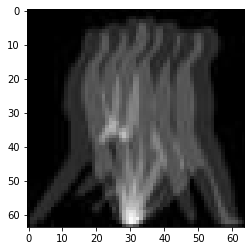

In [ ]:
#Check results on a few select images
n=np.random.randint(44, X_test.shape[0])
img = X_test[n]
plt.imshow(img)
input_img = np.expand_dims(img, axis=0) #Expand dims so the input is (num images, x, y, c)
input_img_feature=model.predict(input_img)
input_img_features=input_img_feature.reshape(input_img_feature.shape[0], -1)
prediction_RF = RF_model.predict(input_img_features)[0] 
#prediction_RF = le.inverse_transform([prediction_RF])  #Reverse the label encoder to original name
print("The prediction for this image is: ", prediction_RF)
print("The actual label for this image is: ", y_test[n])

we are doing the PCA in this file because drive is already mounted here :)

will shift the code to the PCA colab file.











### :)


In [ ]:
# To make the training data and labels from the datadir and categories
IMG_SIZE = 64
training_data = []
labels = []

CATEGORIES = ["normal_resized150", "abnormal_resized150"]
DATADIR = "/content/drive/MyDrive/Gait_analysis/all_fixed/data_150"

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            #try:
            img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
            training_data.append(new_array)
            
            if "abnormal_resized150" in category:
                labels.append(0)
            else:
                labels.append(1)
           # except Exception as e:
            #    pass

create_training_data()

In [ ]:
X = np.array(training_data).reshape(len(training_data), 4096).astype(float)
y = np.array(labels)

In [ ]:
X.shape

(276, 4096)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 0)

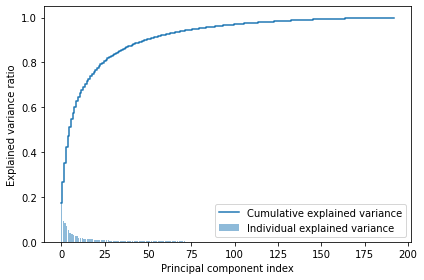

In [ ]:
#
# Scale the dataset; This is very important before you apply PCA
#
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)
#
# Instantiate PCA
#
pca = PCA()
#
# Determine transformed features
#
X_train_pca = pca.fit_transform(X_train_std)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()